In [1]:
import pandas as pd
from ndac.data_processing import quantile_classify, encode_sequence
from ndac.predict import train_clstm

/Users/joshsmith/Git/NovoNordisk_Capstone/.env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# read in sequence/property data
data = pd.read_csv('dataframes/DF_prest.csv', index_col=0)

# vary high/low cutoff quantiles (balanced)

45206 samples input.
22587 samples above high cut, 22619 samples below low cut.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 4)            304       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 200, 128)          1664      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 100, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 93,669
Trainable params: 93,669
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1
31392/31392 [==============================

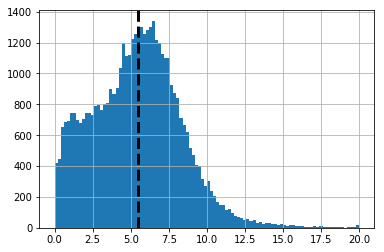

In [7]:
# split quantiles and encode with nucleotide sequence
df, hist = quantile_classify(data['conc_cf'], data['nt_seq'], 0.5)
X, y = encode_sequence(df['nt_seq'], df['class'],
                       max_length=200, tag='GACAAGCTTGCGGCCGCA')

nt_model = train_clstm(X, y, test_fraction=0.3, 
                       epochs=1)

45206 samples input.
11302 samples in class 0
11301 samples in class 1
22603 samples removed.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 4)            296       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 200, 128)          1664      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 100, 128)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 93,661
Trainable params: 93,661
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1
15677/15677 [================

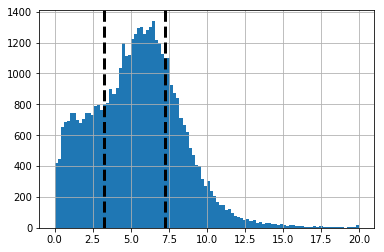

In [8]:
# split quantiles and encode with nucleotide sequence
df, hist = quantile_classify(data['conc_cf'], data['nt_seq'],
                             [0.25, 0.75], drop_class=[1])
X, y = encode_sequence(df['nt_seq'], df['class'],
                       max_length=200, tag='GACAAGCTTGCGGCCGCA')

nt_model = train_clstm(X, y, test_fraction=0.3, 
                       epochs=1)

### adjust high/low cutoff quantiles (unbalanced)

45206 samples input.
9065 samples in class 0
4493 samples in class 1
4521 samples in class 2
27127 samples removed.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 4)            296       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 200, 128)          1664      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 100, 128)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 303       
Total params: 93,863
Trainable params: 93,863
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1
12534/1

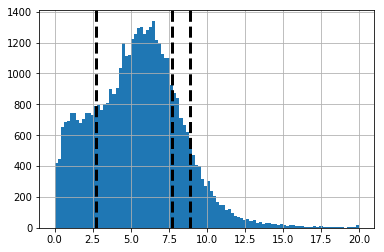

In [10]:
# split quantiles and encode with nucleotide sequence
df, hist = quantile_classify(data['conc_cf'], data['nt_seq'],
                             [0.2, 0.8, 0.9], drop_class=[1])
X, y = encode_sequence(df['nt_seq'], df['class'],
                       max_length=200, tag='GACAAGCTTGCGGCCGCA')

nt_model = train_clstm(X, y, test_fraction=0.3, 
                       epochs=1)